In [62]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from astropy.io import fits
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [63]:
count = 0
date = np.zeros(13)
rv = np.zeros(13)
rv_err = np.zeros(13)
print(date)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [64]:
with open('roque12_vrad.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        if row[0]!='date':
          #print(count)
          day = int(row[0][0:4]) + ((int(row[0][5:7]))-1)/12.0 +(int(row[0][8:10]))/365.0
          date[count] = day + (int(row[0][11:13]))/(365.0*24) + (int(row[0][14:16]))/(365.0*24*60)
          rv[count] = float(row[7])
          rv_err[count] = abs((float(row[3]) - float(row[4])))/2.0
          #print(date[count],rv[count],rv_err[count])
          count = count+1

In [72]:
av_october = np.average(rv[0:4])
av_oct_err = np.average(rv_err[0:4])
print(av_october,av_oct_err)
av_january = np.average(rv[4:])
av_jan_err = np.average(rv_err[4:])
print(av_january,av_jan_err)
av = np.average(rv)
av_err = np.average(rv_err)
print(av,av_err)

-1.0998226907073532 2.316219001817424
4.257099084024416 2.3612555321072835
2.6088154610300256 2.3473981381719415


<ErrorbarContainer object of 3 artists>

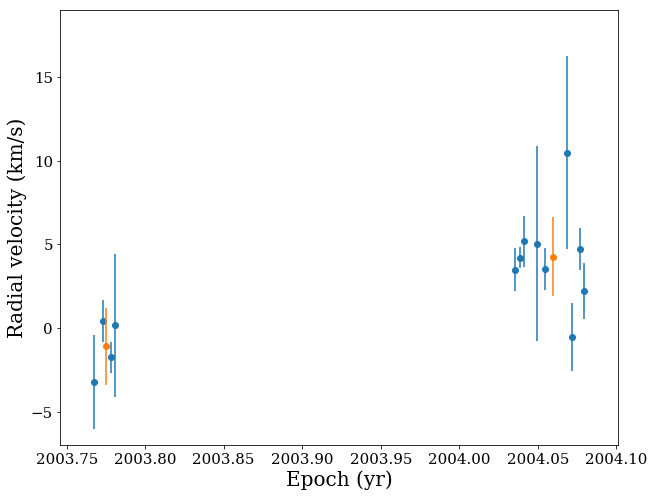

In [69]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='15')
plt.rc('ytick', labelsize='15')
fig = plt.figure(figsize=(10, 8))

plt.xlabel('Epoch (yr)',fontsize=20)
plt.ylabel('Radial velocity (km/s)', fontsize=20)
plt.ylim(-7,19)
#plt.xlim(2230,2240)
plt.scatter(date,rv,marker='o')
plt.errorbar(date,rv,rv_err,linestyle='')
plt.scatter([2003.775,2004.06],[av_october,av_january])
plt.errorbar([2003.775,2004.06],[av_october,av_january],[av_oct_err,av_jan_err],linestyle='')